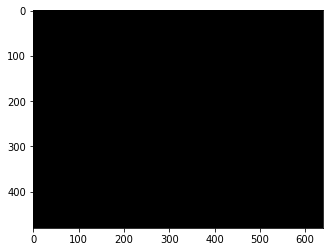

In [23]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

n=640
m=480

pil_im = Image.new('RGB', (n, m))

np_im = np.asarray(pil_im)
imshow(np_im)

In [5]:
#TODO: uniforma tutti i metodi

def generate_bboxes_16_9(image):

    h = image.shape[0]
    w = image.shape[1]
    h_step = 9
    w_step = 16
    annotations = list()
    for i in range(14,30):
        out_h = h_step*i
        out_w = w_step*i
        if out_h < h and out_w < w and out_h*out_w>0.4*h*w:
            for w_start in range(0,w-out_w,w_step):
                for h_start in range(0,h-out_h,h_step):
                    annotations.append([float(h_start),float(w_start),float(h_start+out_h-1),float(w_start+out_w-1)])
    return annotations

def generate_bboxes_4_3(image):

    h = image.shape[0]
    w = image.shape[1]
    h_step = 12
    w_step = 16
    annotations = list()
    for i in range(14,30):
        out_h = h_step*i
        out_w = w_step*i
        if out_h < h and out_w < w and out_h*out_w>0.4*h*w:
            for w_start in range(0,w-out_w,w_step):
                for h_start in range(0,h-out_h,h_step):
                    annotations.append([float(h_start),float(w_start),float(h_start+out_h-1),float(w_start+out_w-1)])
    return annotations

def generate_bboxes_1_1(image):

    h = image.shape[0]
    w = image.shape[1]
    h_step = 12
    w_step = 12
    annotations = list()
    for i in range(14,30):
        out_h = h_step*i
        out_w = w_step*i
        if out_h < h and out_w < w and out_h*out_w>0.4*h*w:
            for w_start in range(0,w-out_w,w_step):
                for h_start in range(0,h-out_h,h_step):
                    annotations.append([float(h_start),float(w_start),float(h_start+out_h-1),float(w_start+out_w-1)])
    return annotations

[0.0, 0.0, 311.0, 415.0]


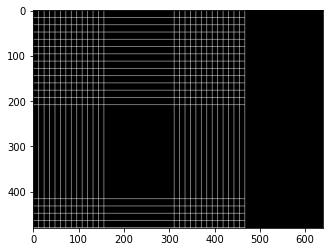

In [24]:
from PIL import ImageFont, ImageDraw, ImageEnhance

print(generate_bboxes_4_3(np_im)[0])

draw = ImageDraw.Draw(pil_im)

for bbox in generate_bboxes_4_3(np_im):    
    draw.rectangle(((bbox[0], bbox[1]), (bbox[2], bbox[3])),  outline="white")

imshow(np.asarray(pil_im))